## Measures of Descriptive statistics-Central Tendency, spread

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv('house_price.csv')
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [16]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## 1- Mean Function 

In [20]:
mean_price_per_sqft = data['price_per_sqft'].mean()
std_dev_price_per_sqft = data['price_per_sqft'].std()

In [28]:
threshold = 3
data_mean = data[(data['price_per_sqft'] >= mean_price_per_sqft - threshold * std_dev_price_per_sqft) & (data['price_per_sqft'] <= mean_price_per_sqft + threshold * std_dev_price_per_sqft)]
print(data_mean)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

## 2 - Percentile method

In [31]:
upper_limit = data['price_per_sqft'].quantile(0.99)
lower_limit = data['price_per_sqft'].quantile(0.01)
print('upper limit', upper_limit)
print('lower limit', lower_limit)

upper limit 23674.45000000001
lower limit 2549.0


<Axes: >

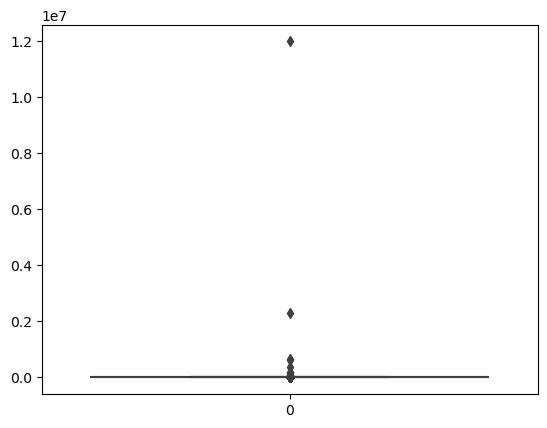

In [33]:
sns.boxplot(data['price_per_sqft'])

In [42]:
data.loc[(data['price_per_sqft'] > upper_limit) | (data['price_per_sqft'] < lower_limit)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [43]:
trim_data = data.loc[(data['price_per_sqft']  <= upper_limit) & (data['price_per_sqft'] >= lower_limit)]
print('old data:', len(data))
print('new data:', len(trim_data))
print('outliers:', len(data)-len(trim_data))

old data: 13200
new data: 12941
outliers: 259


<Axes: >

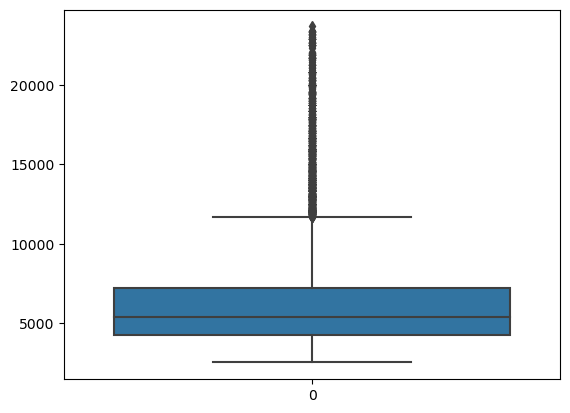

In [44]:
sns.boxplot(trim_data['price_per_sqft'])

In [46]:
# capping - change the outlier valuesto upper (or) lower limit values
trim_data = data.copy()
trim_data.loc[(trim_data['price_per_sqft']>upper_limit), 'price_per_sqft'] = upper_limit
trim_data.loc[(trim_data['price_per_sqft']<lower_limit), 'price_per_sqft'] = lower_limit
print(trim_data)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0              3699.0  
1              4615.0  
2  

<Axes: >

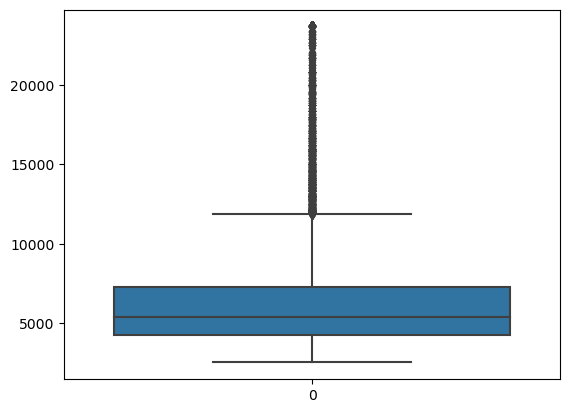

In [47]:
sns.boxplot(trim_data['price_per_sqft'])

C:\Users\HP\AppData\Local\Temp\ipykernel_3436\3464376093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

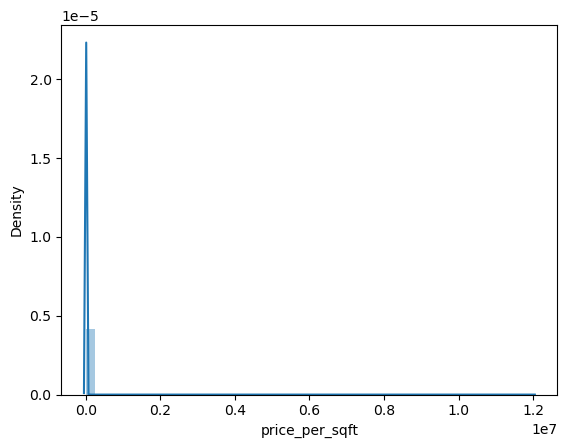

In [48]:
# old distplot
sns.distplot(data['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

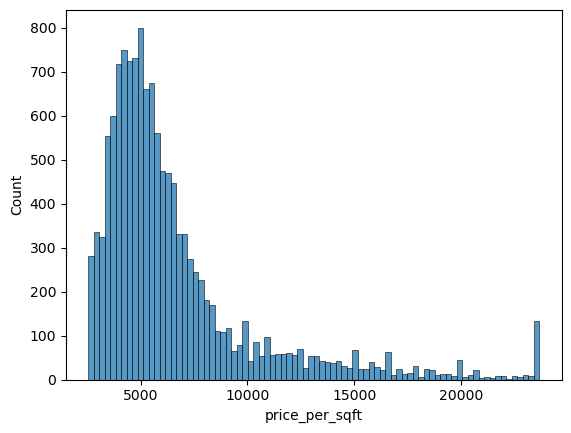

In [49]:
sns.histplot(trim_data['price_per_sqft'])

C:\Users\HP\AppData\Local\Temp\ipykernel_3436\2588026466.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trim_data['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

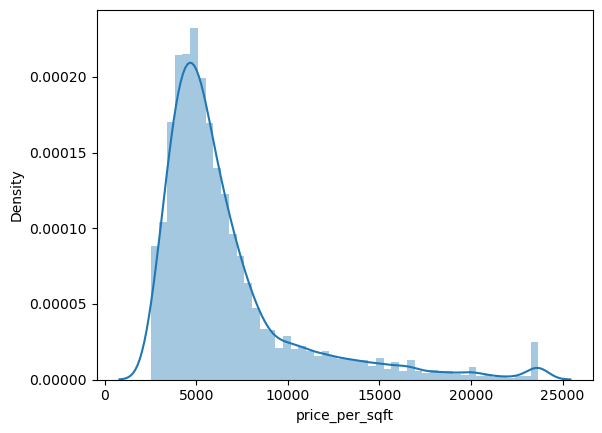

In [50]:
sns.distplot(trim_data['price_per_sqft'])

## 3 - IQR Method

In [57]:
Q1 = data['price_per_sqft'].quantile(0.25)
Q3 = data['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
data.loc[(data['price_per_sqft'] > Q3 + 1.5 * IQR) | (data['price_per_sqft'] < Q1 - 1.5 * IQR)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [58]:
trim_data = data.loc[(data['price_per_sqft']  <= Q3 + 1.5 * IQR ) & (data['price_per_sqft'] >= Q1 - 1.5 * IQR)]
print('old data:', len(data))
print('new data:', len(trim_data))
print('outliers:', len(data)-len(trim_data))

old data: 13200
new data: 11935
outliers: 1265


<Axes: >

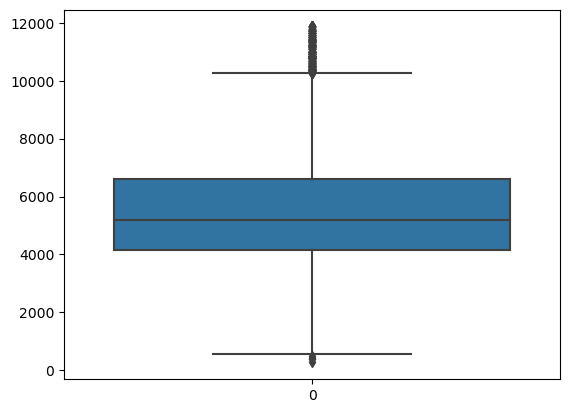

In [59]:
sns.boxplot(trim_data['price_per_sqft'])

In [63]:
trim_data = data.copy()
trim_data.loc[(trim_data['price_per_sqft']> Q3 + 1.5 * IQR), 'price_per_sqft'] = upper_limit
trim_data.loc[(trim_data['price_per_sqft']< Q1 - 1.5 * IQR), 'price_per_sqft'] = lower_limit
print(trim_data)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0              3699.0  
1              4615.0  
2  

<Axes: >

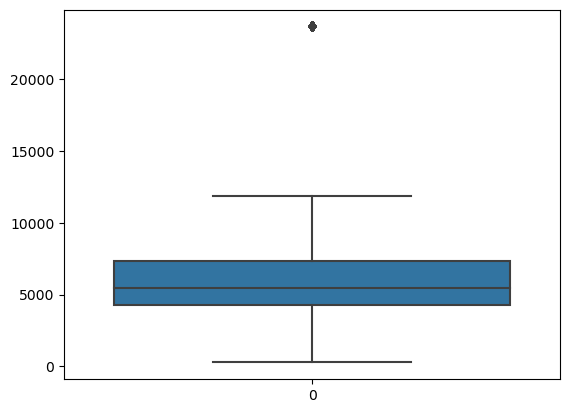

In [65]:
sns.boxplot(trim_data['price_per_sqft'])

## 4 - Z Score Method:

In [67]:
upper_limit = data['price_per_sqft'].mean() + 3*data['price_per_sqft'].std()
lower_limit = data['price_per_sqft'].mean() - 3*data['price_per_sqft'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 328101.8177267496
lower limit: -312261.1442419011


In [69]:
data.loc[(data['price_per_sqft']  > upper_limit) | (data['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [74]:
trim_data = data.loc[(data['price_per_sqft']  <= upper_limit) & (data['price_per_sqft'] >= lower_limit)]
print('old data:', len(data))
print('new data:', len(trim_data))
print('outliers:', len(data)-len(trim_data))

old data: 13200
new data: 13195
outliers: 5


<Axes: >

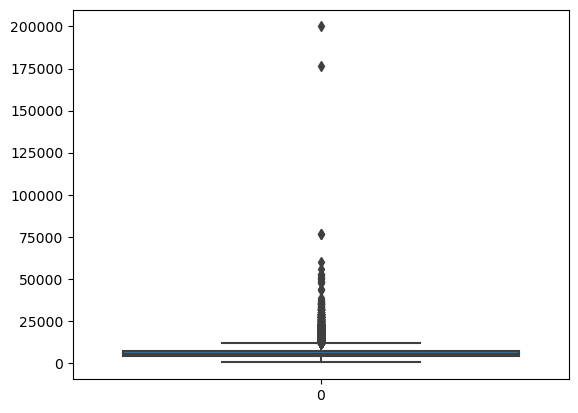

In [75]:
sns.boxplot(trim_data['price_per_sqft'])

In [76]:
trim_data = data.copy()
trim_data.loc[(trim_data['price_per_sqft']> Q3 + 1.5 * IQR), 'price_per_sqft'] = upper_limit
trim_data.loc[(trim_data['price_per_sqft']< Q1 - 1.5 * IQR), 'price_per_sqft'] = lower_limit
print(trim_data)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0              3699.0  
1              4615.0  
2  

<Axes: >

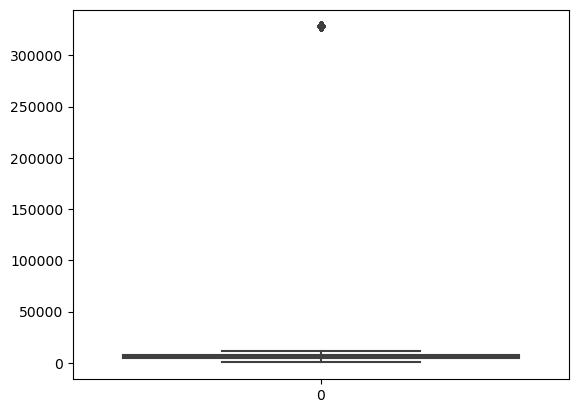

In [77]:
sns.boxplot(trim_data['price_per_sqft'])

## 5 - Normal Distribution Method

In [83]:
from scipy.stats import norm

mu, std = norm.fit(data['price_per_sqft'])
upper_limit_normal = mu + 2 * std
lower_limit_normal = mu - 2 * std
data.loc[(data['price_per_sqft']  > upper_limit) | (data['price_per_sqft'] < lower_limit)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [86]:
trim_data = data.loc[(data['price_per_sqft']  <= upper_limit_normal) & (data['price_per_sqft'] >= lower_limit_normal)]
print('old data:', len(data))
print('new data:', len(trim_data))
print('outliers:', len(data)-len(trim_data))

old data: 13200
new data: 13195
outliers: 5


<Axes: >

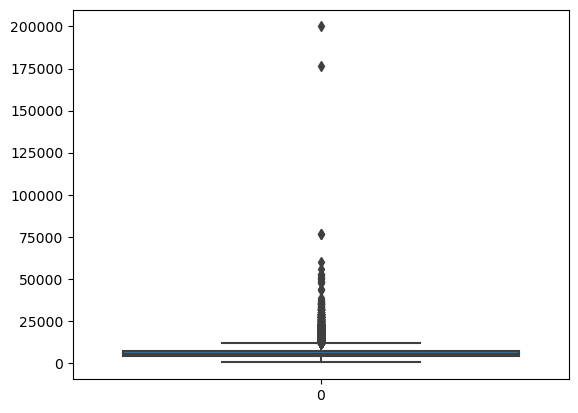

In [87]:
sns.boxplot(trim_data['price_per_sqft'])